In [30]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
np.random.seed(2018)
import nltk
import os, glob
import pandas as pd 
from collections import defaultdict
from pathlib import Path
from gensim import corpora, models
from pprint import pprint
import pyLDAvis 
import pyLDAvis.gensim
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')
nltk.download('omw-1.4')

# for lemmatization and stemming
stemmer = SnowballStemmer(language='english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token)) 
    return result

# Load files and arrange them by year
files_folder = 'full_text/cleaned/cleaned_text/'

results = defaultdict(list)
for file in Path(files_folder).glob('**/*.txt'):
    with open(file, "r") as file_open:
        try:
            # extract year from the file name
            year = int(file.name[:4])
            results["file_name"].append(file.name)
            results["text"].append(file_open.read())
            results["year"].append(year)
            print(f"Added file {file.name} with year {year}")
        except ValueError as ve:
            print(f"Cannot extract year from {file.name}. Skipping this file.")

df = pd.DataFrame(results)

# Check the DataFrame
print(df.head())

# Ensure 'year' column is integer type before sorting
df['year'] = df['year'].astype(int)

# Sort by year
df = df.sort_values(by=['year'])
df.reset_index(drop=True, inplace=True)


# Define your time periods
time_periods = [
    (None, 2012),    # before 2013
    (2013, 2016),    # 2013-2016
    (2017, 2017),    # 2017
    (2018, 2018),    # 2018
    (2019, 2020),    # 2019-2020
    (2021, 2021),    # 2021
    (2022, 2022),    # 2022
    (2023, None)     # 2023 and after
]

# Define the time slices for the DTM based on the number of documents per time period
time_slices = []
for start, end in time_periods:
    if start is None:
        time_slices.append(len(df[df['year'] <= end]))
    elif end is None:
        time_slices.append(len(df[df['year'] >= start]))
    else:
        time_slices.append(len(df[(df['year'] >= start) & (df['year'] <= end)]))

data_text = df[['text']]
data_text['index'] = data_text.index
documents = data_text

# Preprocess the documents
processed_docs = documents['text'].map(preprocess)

# Create a dictionary from the processed documents
dictionary = gensim.corpora.Dictionary(processed_docs)

# Create the Bag-of-words model for each document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Run the DTM
ldaseq = gensim.models.LdaSeqModel(corpus=bow_corpus, id2word=dictionary, time_slice=time_slices, num_topics=3)


[nltk_data] Downloading package wordnet to /Users/teng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/teng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/var/folders/fw/7bb2qfvs6yj3pqyfw9zjb7gc0000gn/T/ipykernel_12146/596503817.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


Added file 20170426 LB Lukas Borke DISS.pdf.txt.txt with year 2017
Added file 20190617 EK Klochkov DISS.pdf.txt.txt with year 2019
Added file 20211011 JH Jeremy HU DISS.pdf.txt.txt with year 2021
Added file 20180409 STR Simon Trimborn DISS.pdf.txt.txt with year 2018
Added file 20170221 LS Lining Yu DISS.pdf.txt.txt with year 2017
Added file 2004Mercurio.pdf.txt.txt with year 2004
Added file 2002Kleinow.pdf.txt.txt with year 2002
Added file 20190404 YQ Ya Qian DISS.pdf.txt.txt with year 2019
Added file 20181101 AB Artem Beque DISS.pdf.txt.txt with year 2018
Added file 20210806 DJ Daniel Jacob DISS.pdf.txt.txt with year 2021
Added file 20180107 AZ Alona Zharova DISS.pdf.txt.txt with year 2018
Added file 2007detlefsen.pdf.txt.txt with year 2007
Added file 2007chen.pdf.txt.txt with year 2007
Added file 20180531 AP Alla Pethukina DISS.pdf.txt.txt with year 2018
Added file 20170914 X2 Xiu Xu DISS.pdf.txt.txt with year 2017
Added file 20161114 FS Franziska Schulz DISS.pdf.txt.txt with year 20

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gensim/models/ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [40]:
# Print the topics through time
for time in range(len(time_slices)):
    print(f"Time slice: {time}")
    for i, topic in enumerate(ldaseq.print_topics(time)):
        print(f"Topic: {i} \nWords: {topic}")


Time slice: 0
Topic: 0 
Words: [('data', 0.01269333503588214), ('client', 0.012375922392424613), ('tree', 0.011275064778539776), ('method', 0.008870099350642884), ('statist', 0.008053318527088616), ('class', 0.007460517483710847), ('server', 0.0072908502465547686), ('java', 0.005951578846371026), ('xplore', 0.004842561961739803), ('learn', 0.00468558593585781), ('result', 0.0044629185258672245), ('prune', 0.004432449182368385), ('node', 0.004407489076247618), ('public', 0.004361385639778519), ('user', 0.004290193128141911), ('exampl', 0.004182208095359893), ('return', 0.004106958004363544), ('classi', 0.003923929459205222), ('model', 0.0038443000080028837), ('string', 0.0037027096229589346)]
Topic: 1 
Words: [('estim', 0.01985516569657202), ('model', 0.019096938963910032), ('time', 0.011654906903210832), ('function', 0.011113274320035395), ('price', 0.010282734200956047), ('risk', 0.00822019121999044), ('volatil', 0.007973483670106198), ('data', 0.007417050372224395), ('distribut', 0.0

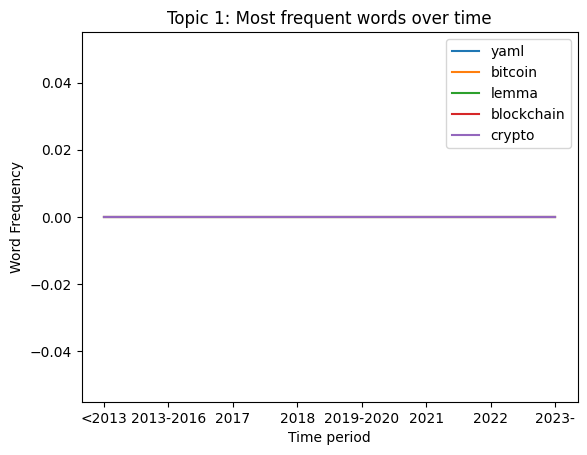

In [43]:
import matplotlib.pyplot as plt

# Define the labels for the time periods for the plot
time_period_labels = [
    '<2013',
    '2013-2016',
    '2017',
    '2018',
    '2019-2020',
    '2021',
    '2022',
    '2023-'
]

# Extract the topic distributions for each word over time
yaml_evolution = [dict(ldaseq.print_topic_times(topic=0)[time]).get('coin', 0) for time in range(len(time_slices))]
bitcoin_evolution = [dict(ldaseq.print_topic_times(topic=0)[time]).get('bitcoin', 0) for time in range(len(time_slices))]
lemma_evolution = [dict(ldaseq.print_topic_times(topic=0)[time]).get('lemma', 0) for time in range(len(time_slices))]
blockchain_evolution = [dict(ldaseq.print_topic_times(topic=0)[time]).get('blockchain', 0) for time in range(len(time_slices))]
crypto_evolution = [dict(ldaseq.print_topic_times(topic=0)[time]).get('crypto', 0) for time in range(len(time_slices))]

# Plot the change in frequency for the words 'yaml', 'bitcoin', 'lemma', 'blockchain' and 'crypto'
plt.plot(time_period_labels, yaml_evolution, label='yaml')
plt.plot(time_period_labels, bitcoin_evolution, label='bitcoin')
plt.plot(time_period_labels, lemma_evolution, label='lemma')
plt.plot(time_period_labels, blockchain_evolution, label='blockchain')
plt.plot(time_period_labels, crypto_evolution, label='crypto')
plt.xlabel('Time period')
plt.ylabel('Word Frequency')
plt.title('Topic 1: Most frequent words over time')
plt.legend()
plt.show()
